In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../data/real_estate_dates.csv")[["image_id", "StartTime"]].rename(columns={"StartTime":"upl_time"})

In [3]:
data.upl_time = pd.to_datetime(data.upl_time).dt.to_period('s')

In [4]:
uploads_per_sec = data.groupby("upl_time").size().to_frame().rename(columns={0:"n_uploads"})

In [5]:
uploads_per_sec.sort_values(by="n_uploads", ascending=False, inplace=True)

In [6]:
uploads_per_sec = uploads_per_sec.reset_index()

In [7]:
uploads_per_sec

,upl_time,n_uploads
0,2024-03-01 16:00:01,2413
1,2024-02-16 16:52:39,2214
2,2024-02-16 16:52:22,2127
3,2024-02-08 15:58:40,2113
4,2024-02-16 16:52:26,2099
...,...,...
513333,2024-03-01 11:19:18,1
513334,2024-02-06 15:12:31,1
513335,2024-03-01 11:18:35,1
513336,2024-03-01 11:17:26,1


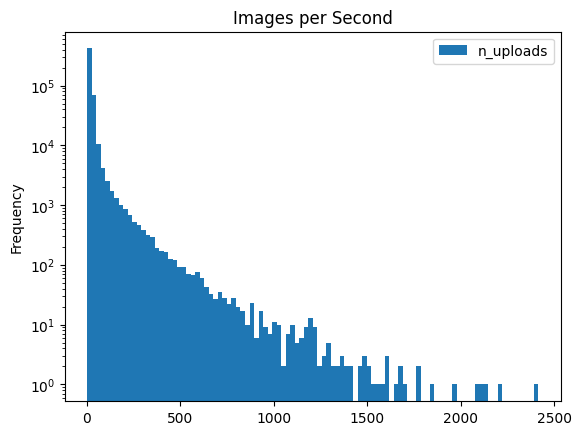

In [8]:
uploads_per_sec.plot(kind="hist", bins = 100, title="Images per Second")

plt.yscale("log")

In [9]:
uploads_per_sec.n_uploads.max()

2413